## NLP with datasets from kaggle

1. Sentiment Analysis Dataset: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset
2. Trump Tweets: https://www.kaggle.com/datasets/austinreese/trump-tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import time
import os

In [2]:
filePath = 'C:/DATASET/'

#### Examine the sentimental dataset

In [3]:
# From sentiment dataset
train = pd.read_csv(filePath+'sentiment_analysis_kaggle/train.csv', encoding='unicode_escape')
test = pd.read_csv(filePath+'sentiment_analysis_kaggle/test.csv', encoding='unicode_escape')

In [4]:
display(train.head(2))
display(test.head(2))

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0


In [5]:
# set the data types of the dataset
train['text']=train['text'].astype('string')
train['selected_text']=train['selected_text'].astype('string')
train['sentiment']=train['sentiment'].astype('category')
train['Time of Tweet']=train['Time of Tweet'].astype('category')
train['Age of User']=train['Age of User'].astype('category')
train['Country']=train['Country'].astype('category')
print(train.dtypes)

textID                object
text                  string
selected_text         string
sentiment           category
Time of Tweet       category
Age of User         category
Country             category
Population -2020       int64
Land Area (Km²)      float64
Density (P/Km²)        int64
dtype: object


In [6]:
print(train.shape)
print(test.shape)

(27481, 10)
(4815, 9)


In [7]:
train[train['text'].isnull()]

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
314,fdb77c3752,<NA>,<NA>,neutral,night,31-45,Namibia,2540905,823000.0,3


In [8]:
test[test['text'].isnull()]

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
3534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [10]:
train['Time of Tweet'].value_counts()

morning    9161
night      9160
noon       9160
Name: Time of Tweet, dtype: int64

In [11]:
train['Age of User'].value_counts()

0-20      4581
21-30     4580
31-45     4580
46-60     4580
60-70     4580
70-100    4580
Name: Age of User, dtype: int64

In [12]:
cols=['Age of User', 'Time of Tweet']
temp = train.groupby(by=cols)['sentiment'].count()
display(temp)

Age of User  Time of Tweet
0-20         morning          4581
             night               0
             noon                0
21-30        morning             0
             night               0
             noon             4580
31-45        morning             0
             night            4580
             noon                0
46-60        morning          4580
             night               0
             noon                0
60-70        morning             0
             night               0
             noon             4580
70-100       morning             0
             night            4580
             noon                0
Name: sentiment, dtype: int64

- seems like the 'Time of Tweet' data is not complete

In [13]:
# train[(train['Age of User'] == '31-45') & (train['Time of Tweet'] == 'night')]

In [16]:
cols=['Age of User', 'Country']
temp = train.groupby(by=cols)['sentiment'].count().reset_index().sort_values(['Country', 'Age of User'], ascending=True)
#temp.columns = cols + ['Count']
display(temp)
print(temp.shape)

,Age of User,Country,sentiment
0,0-20,Afghanistan,85
195,21-30,Afghanistan,0
390,31-45,Afghanistan,0
585,46-60,Afghanistan,64
780,60-70,Afghanistan,0
...,...,...,...
389,21-30,Zimbabwe,0
584,31-45,Zimbabwe,64
779,46-60,Zimbabwe,0
974,60-70,Zimbabwe,0


(1170, 3)


In [23]:
# check the number of age groups that has no zero counts of sentiment
temp2 = temp[temp.sentiment > 0].groupby(by='Country')['Age of User'].count()\
            .reset_index().sort_values(['Age of User'], ascending=False)
display(temp2)


,Country,Age of User
0,Afghanistan,2
146,Saint Lucia,2
124,Nicaragua,2
125,Niger,2
126,Nigeria,2
...,...,...
67,Grenada,2
68,Guatemala,2
69,Guinea,2
70,Guinea-Bissau,2


- seems like none of the countries have data across all age groups

In [24]:
# get total number of sentiments for each country from temp
temp_total = temp.groupby(by='Country')['sentiment'].sum().reset_index()
display(temp_total)

,Country,sentiment
0,Afghanistan,149
1,Albania,149
2,Algeria,149
3,Andorra,149
4,Angola,149
...,...,...
190,Venezuela,127
191,Vietnam,127
192,Yemen,127
193,Zambia,127


In [25]:
#fg_plot = sns.FacetGrid(temp, row='Age of User', height=2.5, aspect=10)
#fg_plot.map(sns.barplot, 'Country', 'sentiment', order=np.sort(train['Country'].unique()))
#plt.show()

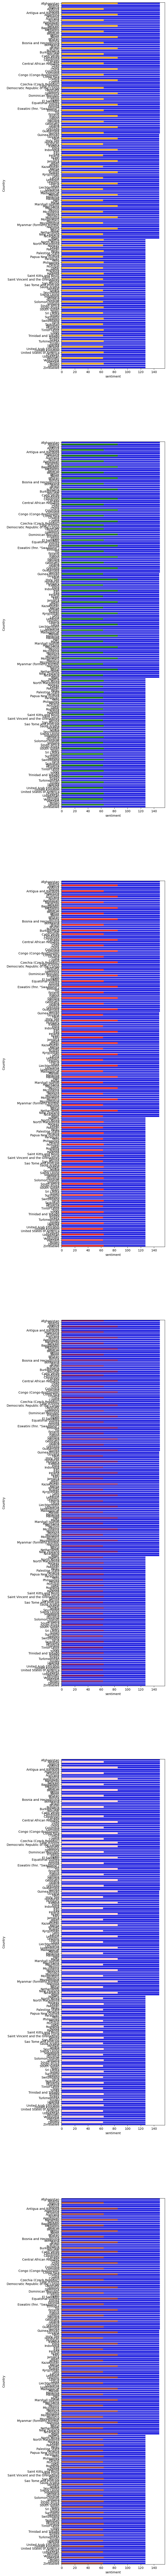

In [27]:
# Initialize the matplotlib figure
f, ax = plt.subplots(6, figsize=(6, 150))
sns.color_palette(palette="muted", n_colors=7)

age_group = ['0-20', '21-30', '31-45', '46-60', '60-70', '70-100']
color=['orange', 'green', 'red', 'purple', 'pink', 'brown']
for i in range(len(age_group)):  #range(len(age_group), len(age_group)-2, -1):
    # Plot the total number of sentiments in each country
    sns.barplot(x="sentiment", y="Country", data=temp_total, 
                order=np.sort(train['Country'].unique()),
                label="Total", color='blue', ax=ax[i])
    
    # Plot the number of sentiments in each Age Group
    sns.barplot(x="sentiment", y="Country", data=temp[temp['Age of User'] == age_group[i]],
                order=np.sort(train['Country'].unique()),
                label='age', color=color[i], ax=ax[i])#, alpha=0.3)
    #break

plt.show()

### Text Classification

In [28]:
train_set = train[~train['text'].isnull()][['text','sentiment']]
test_set = test[~test['text'].isnull()][['text','sentiment']]

In [ ]:
# Model 1: using CountVectorizer

In [29]:
#from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_set['text'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

start_time = time.time()
clf = MultinomialNB().fit(X_train_tfidf, train_set['sentiment'])
print("model training time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

model training time taken : 0.00 min


In [30]:
# Evaluate model with train/test dataset

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

y_pred = clf.predict(count_vect.transform(train_set['text']))
accuracy1 = accuracy_score(train_set['sentiment'], y_pred)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))

y_pred = clf.predict(count_vect.transform(test_set['text']))
accuracy2 = accuracy_score(test_set['sentiment'], y_pred)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))


Train set Accuracy: 75.05%
Test set Accuracy: 64.52%


In [31]:
# Model 2: using tfidfvectorizer

In [32]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, 
                             norm='l2', encoding='latin-1', 
                             ngram_range=(1, 2),
                             stop_words='english')

features = vectorizer.fit_transform(train_set['text']).toarray()
labels = train_set['sentiment']

In [33]:
print(features.shape)
print(labels.shape)

(27480, 21323)
(27480,)


In [34]:
X_train_tfidf = tfidf_transformer.fit_transform(features)

start_time = time.time()
clf2 = MultinomialNB().fit(features, labels)
print("model training time taken : {0:.2f} min".format( (time.time()-start_time)/60 ))

model training time taken : 0.03 min


In [35]:
# Evaluate model with train/test dataset

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

y_pred = clf2.predict(vectorizer.transform(train_set['text']))
accuracy1 = accuracy_score(train_set['sentiment'], y_pred)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))

y_pred = clf2.predict(vectorizer.transform(test_set['text']))
accuracy2 = accuracy_score(test_set['sentiment'], y_pred)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

Train set Accuracy: 79.63%
Test set Accuracy: 64.15%


### Model 3: SpaCy

In [36]:
train_set = train[~train['text'].isnull()][['text','sentiment']]
test_set = test[~test['text'].isnull()][['text','sentiment']]

In [37]:
# subset the dataset
#num_sample_per_role=5
#subset_ind = np.array(train_set.groupby('sentiment').sample(n=num_sample_per_role).index.values)
subset_ind=train_set.index
print(len(subset_ind))

27480


In [38]:
import spacy

C:\Users\powel\anaconda3\envs\tensor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
# Create a blank 'en' model
nlp = spacy.blank('en')

In [40]:
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL,
    #'exclusive_classes': False,
    #'ngram_size': 1,
}
if "textcat_multilabel" in nlp.pipe_names:
    nlp.remove_pipe("textcat_multilabel")
nlp.add_pipe("textcat_multilabel", config=config)

In [41]:
# Print the names of the pipeline components
print(nlp.pipe_names)

['textcat_multilabel']


In [42]:
# add label to text classifier
text_cat = nlp.get_pipe("textcat_multilabel")
for i in list(train_set['sentiment'].unique()):
    text_cat.add_label(i)

In [43]:
# Converting the dataframe into a list of tuples

import copy
sentiment_values = train_set['sentiment'].unique()
labels_default = dict((v, 0) for v in sentiment_values)
train_set_2 = []
for i, row in train_set[train_set.index.isin(subset_ind)].iterrows():
    label_values = copy.deepcopy(labels_default)
    label_values[row['sentiment']] = 1
    train_set_2.append((row['text'], {"cats": label_values}))
    #break

In [44]:
print(train_set_2[:1])
print(len(train_set_2))

[(' I`d have responded, if I were going', {'cats': {'neutral': 1, 'negative': 0, 'positive': 0}})]
27480


In [45]:
import random
from spacy.util import minibatch, compounding
from spacy.training.example import Example

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat_multilabel']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()

    print("Training the model...")

    # Loop for 10 iterations
    for itn in range(10):
        start_time = time.time()
        
        # Shuffle the training data
        random.shuffle(train_set_2)
        
        losses = {}
        for batch in spacy.util.minibatch(train_set_2, 
                                          #size=10):
                                          size=compounding(len(sentiment_values)*2, len(sentiment_values)*8., 1.001)):
            #print(len(batch))

            for text, annotations in batch:
                #pass
                # create Example
                doc = nlp.make_doc(text)
                #print(text)
                #print(annotations)
                example = Example.from_dict(doc, annotations)
                # Update the model
                nlp.update([example], sgd=optimizer, drop=0.2,
                       losses=losses)

        print("iteration # {}".format(itn+1))
        print(losses)
        print("time taken this iteration : {0:.2f} min".format( (time.time()-start_time)/60 ))

Training the model...
time taken this iteration : 12.19 min
iteration # 0
{'textcat_multilabel': 4522.668485821643}
time taken this iteration : 13.58 min
iteration # 1
{'textcat_multilabel': 3382.6416854714444}
time taken this iteration : 13.96 min
iteration # 2
{'textcat_multilabel': 2936.9109342531046}
time taken this iteration : 13.69 min
iteration # 3
{'textcat_multilabel': 2646.8130893556845}
time taken this iteration : 13.44 min
iteration # 4
{'textcat_multilabel': 2465.229414320529}
time taken this iteration : 14.62 min
iteration # 5
{'textcat_multilabel': 2329.7050964849595}
time taken this iteration : 14.06 min
iteration # 6
{'textcat_multilabel': 2251.8615604163188}
time taken this iteration : 13.10 min
iteration # 7
{'textcat_multilabel': 2191.7470343820396}
time taken this iteration : 12.94 min
iteration # 8
{'textcat_multilabel': 2140.4949038392506}
time taken this iteration : 12.94 min
iteration # 9
{'textcat_multilabel': 2116.8400034933684}


In [46]:
# Save Model to disk
output_dir = filePath+'/sentiment_analysis_kaggle/'
modelName='myModel1'
if not os.path.isdir(output_dir):
    output_dir.mkdir()
nlp.to_disk(output_dir+modelName)
print("Saved model to", output_dir+modelName)

Saved model to C:/DATASET//sentiment_analysis_kaggle/myModel1


In [ ]:
# Load the model
#print("Loading from", output_dir+modelName)
#nlp2 = spacy.load(output_dir+modelName)

In [47]:
# test the trained model

train_text = train_set[['text','sentiment']].reset_index(drop=True)
train_text_pred = []
for text in train_text['text']:
    doc = nlp(text)
    pred = sorted(doc.cats.items(), key=lambda val: val[1], reverse=True)[0][0]
    train_text_pred.append(pred)    

test_text = test_set[['text','sentiment']].reset_index(drop=True)
test_text_pred = []
for text in test_text['text']:
    doc = nlp(text)
    pred = sorted(doc.cats.items(), key=lambda val: val[1], reverse=True)[0][0]
    test_text_pred.append(pred)    

In [48]:
# Evaluate model with train/test dataset

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

accuracy1 = accuracy_score(train_set['sentiment'], train_text_pred)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))

accuracy2 = accuracy_score(test_set['sentiment'], test_text_pred)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

Train set Accuracy: 88.84%
Test set Accuracy: 71.51%


### Model 4: LSTM

In [65]:
display(train_text.head(2))

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative


In [112]:
display(train_text.head(2))

,text,sentiment,sentiment_cat,totalwords
0,"I`d have responded, if I were going",neutral,0,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,2,10


In [114]:
# create a new column for the number of text in each entry
train_text['totalwords'] = train_text['text'].str.split().str.len()
display(train_text.sort_values(by=['totalwords'],ascending=False).head(5))

,text,sentiment,sentiment_cat,totalwords
19886,"AK, flop comes 2K6 I bet 15 get raised to 25 I...",neutral,0,33
25358,: Lol it went okay! As far as I can tell . But...,positive,1,33
6409,My car is in the car hospital for the nxt 7 da...,neutral,0,32
6736,First Happy Mothers Day Second what is it tha...,positive,1,32
3638,How I wish I get at least 2 days-off in a row....,negative,2,32


In [115]:
# create a new column to map sentiment to categorical integers
output_dict = dict(zip(set(train_text['sentiment']), 
                      range(len(set(train_text['sentiment'])))))
print(output_dict)

{'neutral': 0, 'positive': 1, 'negative': 2}


In [116]:
train_text['sentiment_cat'] = train_text['sentiment'].map(output_dict).astype('category')
display(train_text.head(2))

,text,sentiment,sentiment_cat,totalwords
0,"I`d have responded, if I were going",neutral,0,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,2,10


In [152]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# The input text, example could be list of sentences
texts = train_text['text']

# The labels corresponding to the input text
labels = train_text['sentiment_cat']

# Hyperparameters 
max_words = 10000 # max number of words to use in the vocabulary
max_len = 50 # max length of each text (in terms of number of words)
embedding_dim = 256 # dimension of word embeddings
lstm_units = 128 # number of units in the LSTM layer
num_classes = len(set(labels)) # number of classes

In [142]:
# Tokenize the texts and create a vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences so they all have the same length
x = pad_sequences(sequences, maxlen=max_len)

# Create one-hot encoded labels
y = tf.keras.utils.to_categorical(labels, num_classes)

In [143]:
print(x.shape)
print(y.shape)

(27480, 50)
(27480, 3)


In [144]:
x_test = pad_sequences(tokenizer.texts_to_sequences(test_text['text']), maxlen=max_len)
y_test = tf.keras.utils.to_categorical(test_text['sentiment'].map(output_dict).astype('category'), num_classes)

In [145]:
print(x_test.shape)
print(y_test.shape)

(3534, 50)
(3534, 3)


In [146]:
# Create a callback that saves the model's weights
output_dir = filePath+"/sentiment_analysis_kaggle/"
checkpoint_path = "/lstm/myModel3/cp-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=output_dir+checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [153]:
# Build the model
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, embedding_dim, input_length=max_len))
lstm_model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
lstm_model.add(LSTM(lstm_units))
#lstm_model.add(Dense(math.ceil(lstm_units/2), kernel_initializer='normal',
#             kernel_regularizer=regularizers.l2(0.0001), activation=tf.nn.relu)) #hidden layer
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Setup early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

# Train the model
lstm_model.fit(x, y, batch_size=32, epochs=20, callbacks=[es, cp_callback],
              validation_data=(x_test, y_test))

Epoch 1/20
859/859 [==============================] - ETA: 0s - loss: 0.7618 - accuracy: 0.6667
Epoch 1: saving model to C:/DATASET//sentiment_analysis_kaggle//lstm/myModel3\cp-0001.ckpt
859/859 [==============================] - 70s 78ms/step - loss: 0.7618 - accuracy: 0.6667 - val_loss: 0.6333 - val_accuracy: 0.7383
Epoch 2/20
859/859 [==============================] - ETA: 0s - loss: 0.5468 - accuracy: 0.7820
Epoch 2: saving model to C:/DATASET//sentiment_analysis_kaggle//lstm/myModel3\cp-0002.ckpt
859/859 [==============================] - 74s 86ms/step - loss: 0.5468 - accuracy: 0.7820 - val_loss: 0.6210 - val_accuracy: 0.7414


In [154]:
# Evaluate model with train/test dataset

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

X_train_pred = pad_sequences(tokenizer.texts_to_sequences(train_text['text']), maxlen=max_len)
prediction = lstm_model.predict(X_train_pred)
y_train_pred = [np.argmax(x) for x in prediction]
accuracy1 = accuracy_score(train_set['sentiment'].map(output_dict), y_train_pred)
print("Train set Accuracy: {0:.2f}%".format(accuracy1 * 100.0))

X_test_pred = pad_sequences(tokenizer.texts_to_sequences(test_text['text']), maxlen=max_len)
prediction = lstm_model.predict(X_test_pred)
y_test_pred = [np.argmax(x) for x in prediction]
accuracy2 = accuracy_score(test_set['sentiment'].map(output_dict), y_test_pred)
print("Test set Accuracy: {0:.2f}%".format(accuracy2 * 100.0))

859/859 [==============================] - 18s 20ms/step
Train set Accuracy: 85.65%
111/111 [==============================] - 2s 19ms/step
Test set Accuracy: 74.14%


### Examine the Trump tweets dataset

In [156]:
# From Trump Tweets dataset
df_trump_1 = pd.read_csv(filePath+'sentiment_analysis_kaggle/trumptweets.csv')
df_trump_2 = pd.read_csv(filePath+'sentiment_analysis_kaggle/realdonaldtrump.csv')

In [157]:
display(df_trump_1.head(2))
display(df_trump_2.head(2))

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN


,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN


In [161]:
# Looking the dataset to see if there's any missing entries
print("# of Trump Tweets : {}".format(len(df_trump_1)))
missing_tweets = df_trump_1[df_trump_1['content'].isnull()]
print("Any missing text: {}".format(len(missing_tweets)))
display(missing_tweets)

print("# of Trump messages on readldonaldtrump : {}".format(len(df_trump_2)))
missing_texts = df_trump_2[df_trump_2['content'].isnull()]
print("Any missing text: {}".format(len(missing_texts)))
display(missing_texts)

# of Trump Tweets : 41122
Any missing text: 0


,id,link,content,date,retweets,favorites,mentions,hashtags,geo


# of Trump messages on readldonaldtrump : 43352
Any missing text: 0


,id,link,content,date,retweets,favorites,mentions,hashtags


### Predict the sentiments using Model 3: SpaCy

In [162]:
trump1_text_pred = []
for text in df_trump_1['content']:
    doc = nlp(text)
    pred = sorted(doc.cats.items(), key=lambda val: val[1], reverse=True)[0][0]
    trump1_text_pred.append(pred)    


In [190]:
m3_t1_unique, m3_t1_counts = np.unique(trump1_text_pred, return_counts=True)
print(m3_t1_unique)
print(m3_t1_counts)

['negative' 'neutral' 'positive']
[12411 10184 18527]


In [164]:
trump2_text_pred = []
for text in df_trump_2['content']:
    doc = nlp(text)
    pred = sorted(doc.cats.items(), key=lambda val: val[1], reverse=True)[0][0]
    trump2_text_pred.append(pred)   

In [191]:
m3_t2_unique, m3_t2_counts = np.unique(trump2_text_pred, return_counts=True)
print(m3_t2_unique)
print(m3_t2_counts)

['negative' 'neutral' 'positive']
[12827 10999 19526]


### Predict the sentiments using Model 4: SpaCy

In [166]:
m4_trump1_text = pad_sequences(tokenizer.texts_to_sequences(df_trump_1['content']), maxlen=max_len)
prediction = lstm_model.predict(m4_trump1_text)
m4_trump1_pred = [np.argmax(x) for x in prediction]

1286/1286 [==============================] - 25s 20ms/step


In [192]:
m4_trump1_sentiment_pred = [list(output_dict.keys())[list(output_dict.values()).index(x)] for x in m4_trump1_pred]
m4_t1_unique, m4_t1_counts = np.unique(m4_trump1_sentiment_pred, return_counts=True)
print(m4_t1_unique)
print(m4_t1_counts)

['negative' 'neutral' 'positive']
[ 6117 18288 16717]


In [185]:
m4_trump2_text = pad_sequences(tokenizer.texts_to_sequences(df_trump_2['content']), maxlen=max_len)
prediction = lstm_model.predict(m4_trump2_text)
m4_trump2_pred = [np.argmax(x) for x in prediction]

1355/1355 [==============================] - 27s 20ms/step


In [193]:
m4_trump2_sentiment_pred = [list(output_dict.keys())[list(output_dict.values()).index(x)] for x in m4_trump2_pred]
m4_t2_unique, m4_t2_counts = np.unique(m4_trump2_sentiment_pred, return_counts=True)
print(m4_t2_unique)
print(m4_t2_counts)

['negative' 'neutral' 'positive']
[ 6391 19323 17638]


In [258]:
trump_result_predictions = pd.DataFrame({'SpaCy': np.concatenate((m3_t1_counts,m3_t2_counts)),
                                         'LSTM': np.concatenate((m4_t1_counts,m4_t2_counts)),
                                         'Platform': np.repeat(['Twitter', 'readdonaldtrump'], 3, axis=0)},
                                       index = list(m3_t1_unique) * 2)

In [259]:
t1_total = len(df_trump_1[~df_trump_1['content'].isnull()])
t2_total = len(df_trump_2[~df_trump_2['content'].isnull()])

trump_result_predictions['SpaCy_percentage'] = np.concatenate((np.around(m3_t1_counts/t1_total*100,2), 
                                                               np.around(m3_t2_counts/t2_total*100,2)))
trump_result_predictions['LSTM_percentage'] = np.concatenate((np.around(m4_t1_counts/t1_total*100,2), 
                                                              np.around(m4_t2_counts/t2_total*100,2)))

In [260]:
display(trump_result_predictions)

,SpaCy,LSTM,Platform,SpaCy_percentage,LSTM_percentage
negative,12411,6117,Twitter,30.18,14.88
neutral,10184,18288,Twitter,24.77,44.47
positive,18527,16717,Twitter,45.05,40.65
negative,12827,6391,readdonaldtrump,29.59,14.74
neutral,10999,19323,readdonaldtrump,25.37,44.57
positive,19526,17638,readdonaldtrump,45.04,40.69


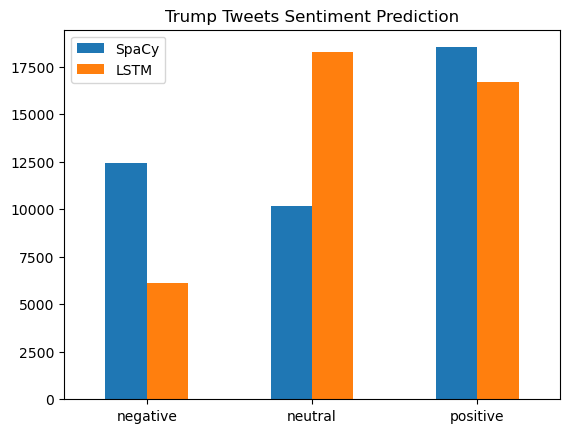

In [262]:
trump_result_predictions[['SpaCy', 'LSTM']][trump_result_predictions['Platform'] == 'Twitter'].plot.bar(rot=0)
plt.title("Trump Tweets Sentiment Prediction")
plt.show()

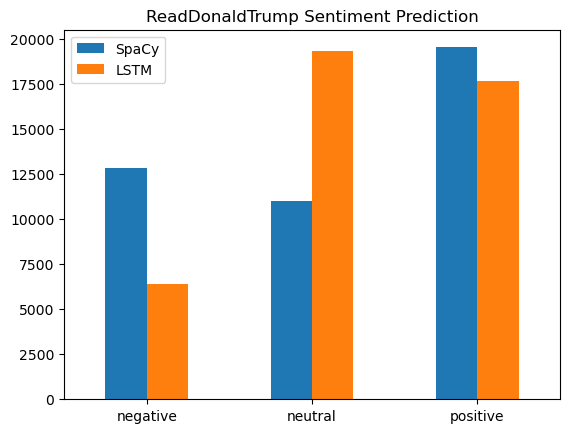

In [263]:
trump_result_predictions[['SpaCy', 'LSTM']][trump_result_predictions['Platform'] == 'readdonaldtrump'].plot.bar(rot=0)
plt.title("ReadDonaldTrump Sentiment Prediction")
plt.show()